In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

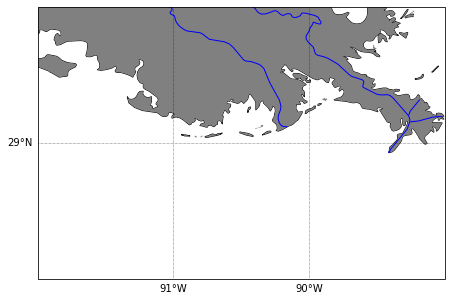

In [5]:
lat_top=30
lat_bot=28
lon_left=-92.
lon_rigth=-89
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [7]:
def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [14]:
path = './../SAT_DATA/IOPS_OCT_NOV_L2_MODIS/A2021285191500.L2_LAC_IOP.x.nc'
ds = xr.open_dataset(path)
def load_satdata(path):
    # Reads a MODIS data file
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    # rename the names of navigation dims so they are the same as the data dims
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    # we have to filter data that doesnt have lat or lon values (nan), 
    # because there can't be a data point without a location
    # ~ means no, ~().isnull(), means give me the values that are NOT nans
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    # filter to get only data with lat/lon values
    data = data.where(mask, drop=True)
    # add 'lat', 'lon' variables to data, from the navigation dataset
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    # return the dataset
    return data

<xarray.Dataset>
Dimensions:           (number_of_lines: 1777, pixels_per_line: 1308)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/32)
    a_412_giop        (number_of_lines, pixels_per_line) float32 0.0192 ... nan
    a_443_giop        (number_of_lines, pixels_per_line) float32 0.0198 ... nan
    a_469_giop        (number_of_lines, pixels_per_line) float32 0.0208 ... nan
    a_488_giop        (number_of_lines, pixels_per_line) float32 0.0221 ... nan
    a_531_giop        (number_of_lines, pixels_per_line) float32 0.0452 ... nan
    a_547_giop        (number_of_lines, pixels_per_line) float32 0.0521 ... nan
    ...                ...
    aph_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0008001 .....
    adg_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0003002 .....
    bbp_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.00012 ... 0.0
    l2_flags          (number_of_lines, pixels_per_line) float64 0.0 ... 1.07...
    lat               (number_of_lines, pixels_per_line) float32 17.68 ... 30.12
    lon               (number_of_lines, pixels_per_line) float32 -78.38 ... -...

In [16]:
ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:           (number_of_lines: 1777, pixels_per_line: 1308)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/32)
    a_412_giop        (number_of_lines, pixels_per_line) float32 0.0192 ... nan
    a_443_giop        (number_of_lines, pixels_per_line) float32 0.0198 ... nan
    a_469_giop        (number_of_lines, pixels_per_line) float32 0.0208 ... nan
    a_488_giop        (number_of_lines, pixels_per_line) float32 0.0221 ... nan
    a_531_giop        (number_of_lines, pixels_per_line) float32 0.0452 ... nan
    a_547_giop        (number_of_lines, pixels_per_line) float32 0.0521 ... nan
    ...                ...
    aph_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0008001 .....
    adg_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0003002 .....
    bbp_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.00012 ... 0.0
    l2_flags          (number_of_lines, pixels_per_line) float64 0.0 ... 1.07...
    lat               (number_of_lines, pixels_per_line) float32 17.68 ... 30.12
    lon               (number_of_lines, pixels_per_line) float32 -78.38 ... -...

C:\Users\12532\AppData\Local\Temp\ipykernel_7808\1383022991.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds['lon'], ds['lat'], ds['a_667_giop']/ds['a_488_giop'])


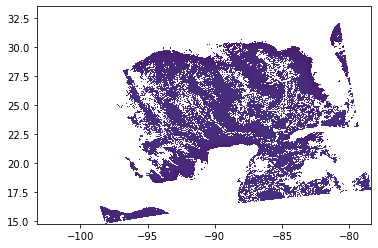

In [17]:
#Rrs(667)/Rrs(488)
plt.pcolormesh(ds['lon'], ds['lat'], ds['a_667_giop']/ds['a_488_giop'])

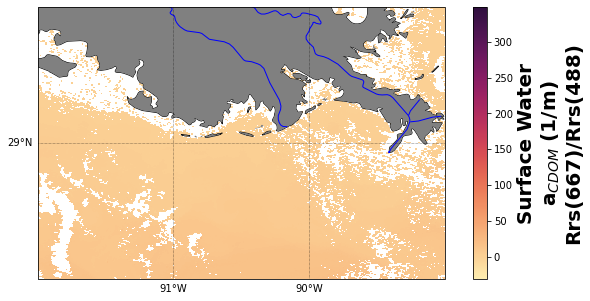

In [24]:
# set the thigs above. I am making fake data for the example:

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_667_giop']/ds['a_488_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (1/m)\n'+'Rrs(667)/Rrs(488)', size=20, weight='bold')
tick_font_size = 16


#make the colorbar
#cb = fig.colorbar(mappable)
#cb.set_label('Abs 350 nm incrase per day')
fig.savefig('../MAPS_Figures/Rrs(667)Rrs(488)_ratio.png')